# Comparing the optimization algorithms
Time it took to run all experiments (PSO, CSFLA, GA) 16829.31s user 3879.21s system 156% cpu 3:40:09.36 total

TODO:

Gather data from all experiments, grouped by month and configuration
Plot fitness results
Friedman test

In [135]:
# Libraries and helper functions
import pickle
import json
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def get_config(file='config.json'):
    with open(file) as cfg_file:  
     return json.load(cfg_file)

def extract_month(filename):
    # Quick workaround to extract name from 10 min data files
    return filename[(filename.find('min_') + 4) :  filename.find('min_') + 10]

def get_all_config_results(cfg, filepath):
    # A bit messy. Creates a table of resulted fitness for each algorithm configuration on each month
    with open(filepath) as cfg_file:  
     all_cfg = json.load(cfg_file)
    df = pd.DataFrame(columns=['config name','data file','mdd', 'no_of_short_selling_transactions', 'no_of_transactions', 'noop', 'realised_profit', 'ret', 'u_buy', 'u_sell', 'value', 'wealth'])
    for config in all_cfg:
        for f in cfg['data']['files']:
            fp = all_cfg[config]['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
            p = pd.Series(pickle.load(open(fp,"rb")), name=(config+' '+f))
            p['config name'] = config
            p['data file'] = f
            p['month'] = extract_month(f)
            df = df.append(p)
    return df

def get_ga_results(cfg):
    df = pd.DataFrame()
    for f in cfg['data']['files']:
        tdf = pd.read_csv(cfg['ga']['base_results_file_path'] + f + '/average_fitness.csv').reset_index().drop('index',1)
        tdf['data file'] = f
        tdf['config name'] = 'ga'
        tdf['month'] = extract_month(f)
        df = df.append(tdf)
    return df

In [136]:
# Load data
cfg = get_config()
csfla = get_all_config_results(cfg, './config/algos/csfla_configs.json')
pso = get_all_config_results(cfg, './config/algos/pso_configs.json')
ga = get_ga_results(cfg)
results = csfla.append(pso.append(ga))

In [137]:
pso.head()

,config name,data file,mdd,no_of_short_selling_transactions,no_of_transactions,noop,realised_profit,ret,u_buy,u_sell,value,wealth,month
pso reference data/fx-spot_EUR_GBP_10min_201309.txt:fx-spot_EUR_GBP_10min_201309:0:20:21:29,pso reference,data/fx-spot_EUR_GBP_10min_201309.txt:fx-spot_...,0.000163,0.0,48.000000,2167.777778,0.867491,0.000173,0.0,0.0,0.000141,500000.867491,201309
pso reference data/fx-spot_EUR_GBP_10min_201310.txt:fx-spot_EUR_GBP_10min_201310:0:20:21:30,pso reference,data/fx-spot_EUR_GBP_10min_201310.txt:fx-spot_...,0.000307,0.0,97.600000,2053.200000,1.417299,0.000283,0.0,0.0,0.000222,500001.417299,201310
pso reference data/fx-spot_EUR_GBP_10min_201311.txt:fx-spot_EUR_GBP_10min_201311:0:20:21:28,pso reference,data/fx-spot_EUR_GBP_10min_201311.txt:fx-spot_...,0.000125,0.0,15.666667,2365.000000,-0.205390,-0.000041,0.0,0.0,-0.000066,499999.794610,201311
pso reference data/fx-spot_EUR_GBP_10min_201312.txt:fx-spot_EUR_GBP_10min_201312:0:20:21:30,pso reference,data/fx-spot_EUR_GBP_10min_201312.txt:fx-spot_...,0.000442,0.0,34.800000,2178.200000,-0.136121,-0.000027,0.0,0.0,-0.000116,499999.863879,201312
pso reference data/fx-spot_EUR_GBP_10min_201401.txt:fx-spot_EUR_GBP_10min_201401:0:20:21:28,pso reference,data/fx-spot_EUR_GBP_10min_201401.txt:fx-spot_...,0.000397,0.0,34.900000,2240.600000,-1.447273,-0.000289,0.0,0.0,-0.000369,499998.552727,201401


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

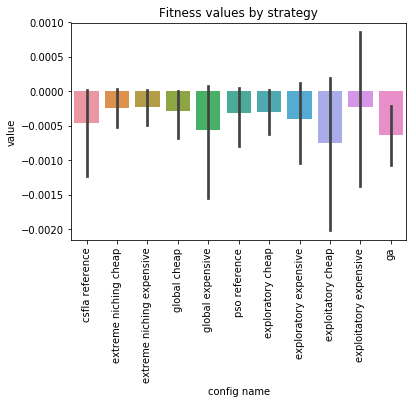

In [138]:
df = results.reset_index()

p = sns.barplot(x='config name', y='value', data=df).set_title('Fitness values by strategy')
plt.xticks(rotation=90)

In [140]:
data = {'ga': ga['value'].mean(), 'pso': pso['value'].mean(), 'csfla': csfla['value'].mean()}
fits = pd.DataFrame.from_dict(data, orient='index')
fits.columns = ['value']
fits

,value
ga,-0.000626
pso,-0.000397
csfla,-0.000350


In [148]:
df['performance rank'] = df['value'].rank(ascending = 0)
ndf = df[['data file', 'config name', 'value']]

In [149]:
ndf = ndf.pivot_table(index='data file', columns='config name', values='value')
ndf.to_csv('fitnessvalues.csv', sep=',')


In [150]:
ndf

config name,csfla reference,exploitatory cheap,exploitatory expensive,exploratory cheap,exploratory expensive,extreme niching cheap,extreme niching expensive,ga,global cheap,global expensive,pso reference
data file,,,,,,,,,,,
data/fx-spot_EUR_GBP_10min_201309.txt:fx-spot_EUR_GBP_10min_201309:0:20:21:29,0.000117,0.000071,0.000044,0.000115,0.000113,0.000130,1.532235e-04,-0.001731,0.000035,0.000178,0.000141
data/fx-spot_EUR_GBP_10min_201310.txt:fx-spot_EUR_GBP_10min_201310:0:20:21:30,0.000142,0.000344,0.000838,0.000252,0.000416,0.000283,1.905698e-04,-0.000988,0.000084,0.000159,0.000222
data/fx-spot_EUR_GBP_10min_201311.txt:fx-spot_EUR_GBP_10min_201311:0:20:21:28,-0.000249,-0.000005,-0.000048,-0.000075,-0.000015,-0.000128,-1.762994e-04,-0.000140,-0.000504,-0.000297,-0.000066
data/fx-spot_EUR_GBP_10min_201312.txt:fx-spot_EUR_GBP_10min_201312:0:20:21:30,0.000113,0.000055,0.000041,0.000046,0.000160,0.000014,-1.807371e-07,-0.001115,-0.000031,0.000177,-0.000116
data/fx-spot_EUR_GBP_10min_201401.txt:fx-spot_EUR_GBP_10min_201401:0:20:21:28,-0.003327,-0.000382,-0.001796,-0.000998,-0.001351,-0.000528,-8.990383e-04,-0.000264,-0.001528,-0.004264,-0.000369
data/fx-spot_EUR_GBP_10min_201402.txt:fx-spot_EUR_GBP_10min_201402:0:20:21:26,-0.000352,0.000703,0.002539,-0.000446,-0.000802,-0.000837,-6.305724e-04,-0.000145,-0.000186,-0.000224,-0.000754
data/fx-spot_EUR_GBP_10min_201403.txt:fx-spot_EUR_GBP_10min_201403:0:20:21:29,0.000148,0.000047,0.000099,0.000088,0.000274,0.000043,7.929126e-06,-0.001397,0.000226,0.000175,0.000132
data/fx-spot_EUR_GBP_10min_201404.txt:fx-spot_EUR_GBP_10min_201404:0:20:21:29,-0.000102,-0.004725,0.000016,-0.000311,0.000034,0.000006,3.802200e-05,-0.000220,-0.000064,-0.000074,0.000083
data/fx-spot_EUR_GBP_10min_201405.txt:fx-spot_EUR_GBP_10min_201405:0:18:19:26,-0.000586,-0.002784,-0.003842,-0.001305,-0.002472,-0.001130,-6.878345e-04,0.000369,-0.000547,-0.000821,-0.002057
